**Linear Regression Assignment**

---


**Overview and Problem Statement**:



*   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to Covid-19. To accelerate the revenue post pandemic, the company has decided to come up with a mindful business plan. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends.
*   Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. Analyse the dataset and model the demand for shared bikes with the available independent variables which will also be useful to understand the demand dynamics of a new market.

**Importing required libraries and loading the dataset**

---



In [85]:
# Load all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action="ignore")



In [86]:
# Importing data
df_day = pd.read_csv("day.csv")

**Following steps have been followed in this assignment**
1. Reading, understanding and visualising the data.
2. Preparing the data for modelling(train-test split, rescaling etc.).
3. Training the model.
4. Residual analysis.
5. Predictions and evaluation on the test set.

**Step 1: Reading, understanding and visualising the data**

In [87]:
# View shape/dimension of the dataset
df_day.shape

(730, 16)

In [88]:
# Viewing the data
# 'cnt' is the target variable/ bike demand
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
# View data description
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [90]:
# Viewing columnwise info of the dataset
df_day.info()
# There are no missing values in any columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [91]:
# Check number of unique values for each column
df_day.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [92]:
# Dropping columns which may not be the driver variables behind predicting 'cnt', like 'instant' is an unique identifier column, 'casual' and 'registered' are just bifurcation of 'cnt'.
df_day = df_day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

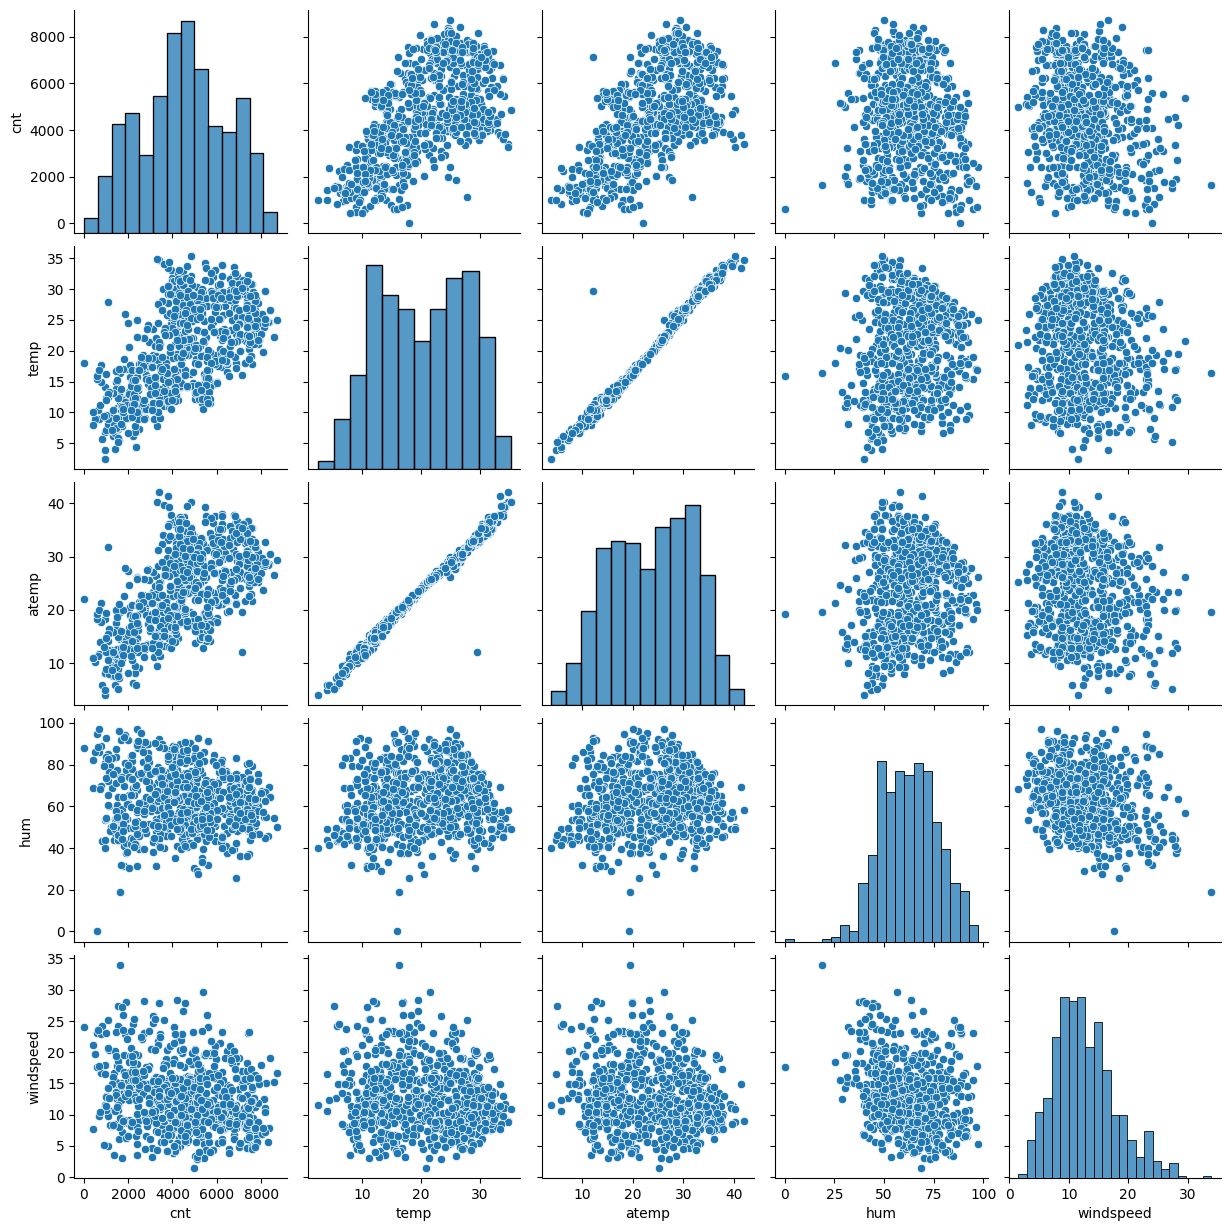

In [93]:
# Visualising numeric variables
sns.pairplot(df_day, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()


<Axes: xlabel='weathersit', ylabel='cnt'>

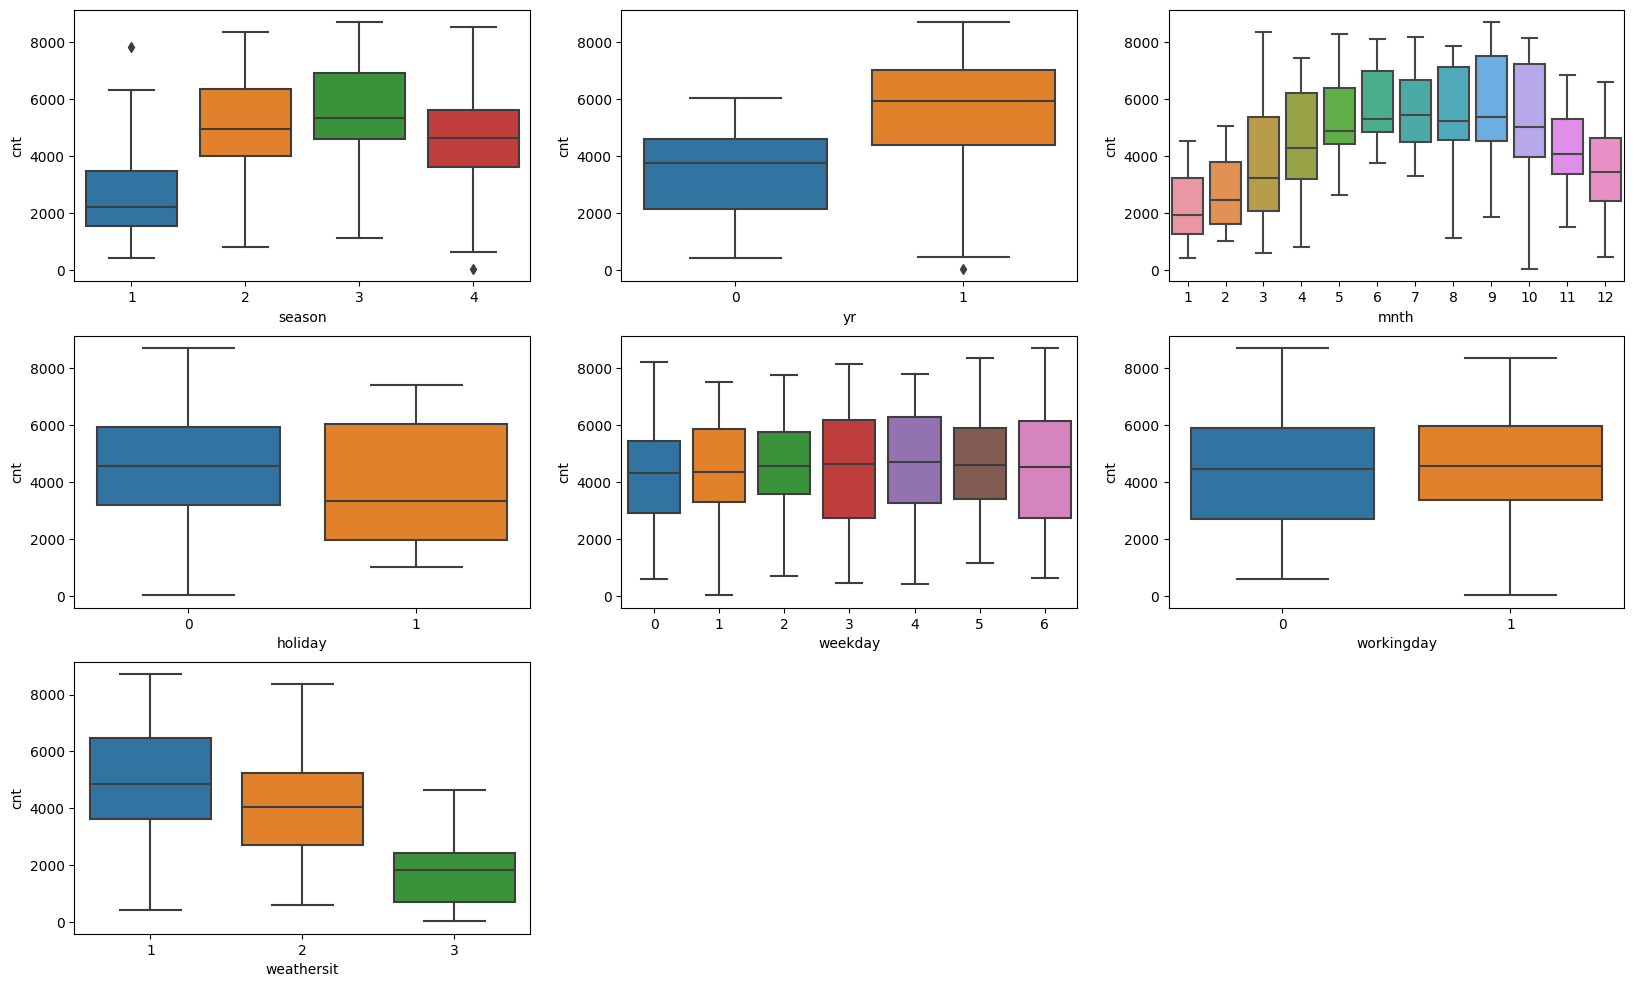

In [94]:
# Visualising Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df_day)
plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df_day)
plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df_day)
plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df_day)
plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df_day)
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=df_day)

**Step 2: Preparing the data for modelling**



In [95]:
# Converting categorical numeric values into categorical string values
df_day[['season']] = df_day[['season']].apply(lambda x:x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}))
df_day[['mnth']] = df_day[['mnth']].apply(lambda x:x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}))
df_day[['weekday']] = df_day[['weekday']].apply(lambda x:x.map({0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}))
df_day[['weathersit']] = df_day[['weathersit']].apply(lambda x:x.map({1: 'weathersit_1', 2: 'weathersit_2', 3: 'weathersit_3'}))

# Check the df_day dataframe now
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sunday,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,monday,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tuesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wednesday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thursday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


In [96]:
# Get the dummy variables for the feature 'season' and drop the first column
season = pd.get_dummies(df_day['season'], drop_first=True)

# Add the results to the original df_day dataframe
df_day = pd.concat([df_day, season], axis=1)

# Drop 'season' as we have created the dummies for it
df_day = df_day.drop('season', axis=1)

# Check the df_day dataframe now
df_day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sunday,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,monday,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,tuesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,wednesday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,thursday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [97]:
# Get the dummy variables for the feature 'weekday' and drop the first column
weekday = pd.get_dummies(df_day['weekday'], drop_first=True)

# Add the results to the original df_day dataframe
df_day = pd.concat([df_day, weekday], axis=1)

# Drop 'season' as we have created the dummies for it
df_day = df_day.drop('weekday', axis=1)

# Check the df_day dataframe now
df_day.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,jan,0,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0
1,0,jan,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0
2,0,jan,0,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0
3,0,jan,0,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1
4,0,jan,0,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0


In [98]:
# Get the dummy variables for the feature 'weathersit' and drop the first column
weathersit = pd.get_dummies(df_day['weathersit'], drop_first=True)

# Add the results to the original df_day dataframe
df_day = pd.concat([df_day, weathersit], axis=1)

# Drop 'season' as we have created the dummies for it
df_day = df_day.drop('weathersit', axis=1)

# Check the df_day dataframe now
df_day.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_2,weathersit_3
0,0,jan,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0
1,0,jan,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0
2,0,jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0
3,0,jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0


In [99]:
# Get the dummy variables for the feature 'weathersit' and drop the first column
mnth = pd.get_dummies(df_day['mnth'], drop_first=True)

# Add the results to the original df_day dataframe
df_day = pd.concat([df_day, mnth], axis=1)

# Drop 'season' as we have created the dummies for it
df_day = df_day.drop('mnth', axis=1)

# Check the df_day dataframe now
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
# Split the Data into training and testing Sets
df_train, df_test = train_test_split(df_day, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [101]:
# Create an object of MinMaxScaler class
scaler = MinMaxScaler()

# Rescaling numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Check the df_day dataframe now
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# View data description
df_train[num_vars].describe()


,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


**Step 3: Training the model**

In [103]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [104]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)



In [105]:
# View selected variables by RFE and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('monday', False, 11),
 ('saturday', False, 16),
 ('sunday', False, 4),
 ('thursday', False, 19),
 ('tuesday', False, 14),
 ('wednesday', False, 15),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1),
 ('aug', False, 13),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('jul', True, 1),
 ('jun', False, 18),
 ('mar', False, 20),
 ('may', False, 12),
 ('nov', False, 7),
 ('oct', False, 17),
 ('sep', True, 1)]

In [106]:
# Store RFE selected variables
col_rfe = X_train.columns[rfe.support_]

# View RFE selected variables
col_rfe

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'weathersit_3', 'jul', 'sep'],
      dtype='object')

In [107]:
# Creating X_train dataframe with RFE selected variables
X_train = X_train[col_rfe]

In [108]:
# Build model with RFE variables

# Adding a constant variable
X_train_sm = sm.add_constant(X_train)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit/train the model
lr_model = lr.fit()

# View Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.79e-186
Time:                        14:34:18   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.292      0.000       0.217       0.319
yr               0.2259      0.008     27.118      0.000       0.210       0.242
holiday         -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp             0.6200      0.023     27.492      0.000       0.576       0.664
hum             -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed       -0.2059      0.026     -7.889      0.000      -0.257      -0.155
summer           0.0800      0.011      7.281      0.000       0.058       0.102
winter           0.1390      0.011     12.903      0.000       0.118       0.160
weathersit_3    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
jul             -0.0482      0.018     -2.606      0.009      -0.085      -0.012
sep              0.0944      0.016      5.724      0.000       0.062       0.127
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Calculate VIF of all variables except 'const'
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)

# View VIF
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
8,jul,1.55
9,sep,1.29
7,weathersit_3,1.09
1,holiday,1.04


In [110]:
# Drop variable 'hum' as this has very high VIF(greater than five).
X_train = X_train.drop('hum', axis=1)

# Build model again with RFE variables

# Adding a constant variable
X_train_sm = sm.add_constant(X_train)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# fit/train the model
lr_model = lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          4.42e-171
Time:                        14:34:18   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0840      0.018      4.794      0.000       0.050       0.118
yr               0.2329      0.009     26.061      0.000       0.215       0.251
holiday         -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp             0.5854      0.024     24.438      0.000       0.538       0.632
windspeed       -0.1459      0.027     -5.365      0.000      -0.199      -0.092
summer           0.0750      0.012      6.346      0.000       0.052       0.098
winter           0.1228      0.011     10.731      0.000       0.100       0.145
weathersit_3    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
jul             -0.0313      0.020     -1.578      0.115      -0.070       0.008
sep              0.0822      0.018      4.640      0.000       0.047       0.117
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Calculate VIF of all variables except 'const'
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)

# View VIF
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,summer,1.75
7,jul,1.51
5,winter,1.43
8,sep,1.28
6,weathersit_3,1.06
1,holiday,1.03


In [112]:
# Drop variable 'jul' as this has high P value hence not significant.
X_train = X_train.drop('jul', axis=1)

# Build model again with RFE variables

# Adding a constant variable
X_train_sm = sm.add_constant(X_train)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# fit/train the model
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          9.22e-172
Time:                        14:34:18   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0875      0.017      5.029      0.000       0.053       0.122
yr               0.2334      0.009     26.093      0.000       0.216       0.251
holiday         -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp             0.5682      0.021     26.580      0.000       0.526       0.610
windspeed       -0.1455      0.027     -5.340      0.000      -0.199      -0.092
summer           0.0812      0.011      7.256      0.000       0.059       0.103
winter           0.1261      0.011     11.179      0.000       0.104       0.148
weathersit_3    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
sep              0.0895      0.017      5.229      0.000       0.056       0.123
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Calculate VIF of all variables except 'const'
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)

# View VIF
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,summer,1.55
5,winter,1.34
7,sep,1.20
6,weathersit_3,1.06
1,holiday,1.03


In [114]:
# P-Values and VIF of all variables look good now. No need of dropping any feature further to optimize the model.

**Step 4: Residual Analysis**

In [115]:
y_train_pred = lr_model.predict(X_train_sm)

Text(0.5, 0, 'Errors')

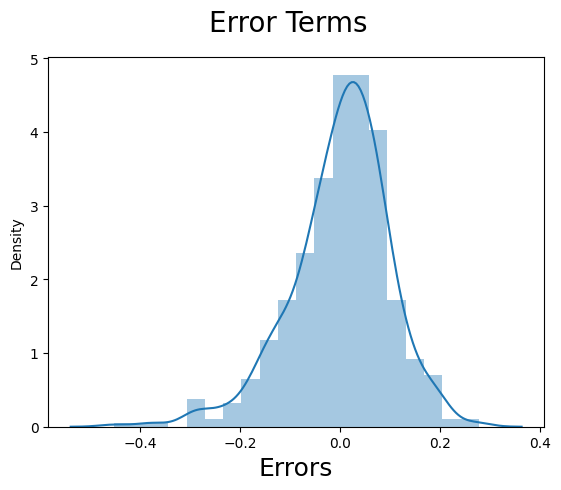

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [117]:
# Error terms are normally distributed in above histogram. Good to go for predictions.

**Step 5: Predictions and evaluation on the test set**

In [118]:
# Applying the scaling on the test dataset
num_vars =  ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [119]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [120]:
# Now let's use the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,windspeed,summer,winter,weathersit_3,sep
184,1.0,0,1,0.831783,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0


In [121]:
# Making predictions
y_test_pred = lr_model.predict(X_test_new)

In [122]:
# Evaluate on R-Square
r2_score(y_true=y_test, y_pred=y_test_pred)

# R-Square looks good

0.7720731949554798

Text(0, 0.5, 'y_pred')

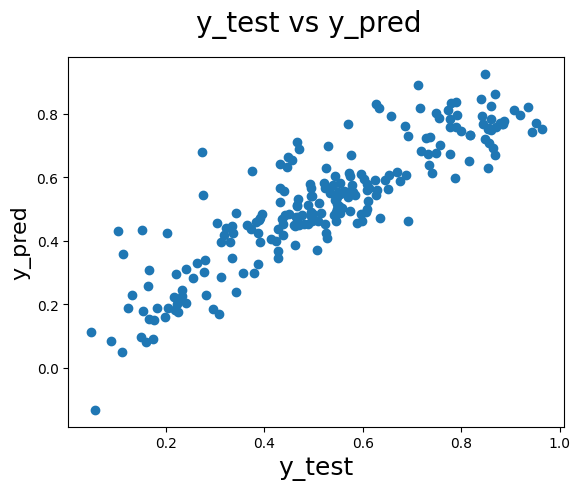

In [123]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label